In [1]:
# import packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# Define the range and increment for age array
start = 1e6  # 1 million
end = 20e6   # 20 million
increment = 0.5e6  # 500,000

# Create log age array
age_arr = np.arange(start, end + increment, increment)
print(age_arr)
age_arr = np.log10(age_arr)
print(age_arr)

[ 1000000.  1500000.  2000000.  2500000.  3000000.  3500000.  4000000.
  4500000.  5000000.  5500000.  6000000.  6500000.  7000000.  7500000.
  8000000.  8500000.  9000000.  9500000. 10000000. 10500000. 11000000.
 11500000. 12000000. 12500000. 13000000. 13500000. 14000000. 14500000.
 15000000. 15500000. 16000000. 16500000. 17000000. 17500000. 18000000.
 18500000. 19000000. 19500000. 20000000.]
[6.         6.17609126 6.30103    6.39794001 6.47712125 6.54406804
 6.60205999 6.65321251 6.69897    6.74036269 6.77815125 6.81291336
 6.84509804 6.87506126 6.90308999 6.92941893 6.95424251 6.97772361
 7.         7.0211893  7.04139269 7.06069784 7.07918125 7.09691001
 7.11394335 7.13033377 7.14612804 7.161368   7.17609126 7.1903317
 7.20411998 7.21748394 7.23044892 7.24303805 7.25527251 7.26717173
 7.2787536  7.29003461 7.30103   ]


In [3]:
# define other isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
# filt_list = ['jwst,F162M', 'jwst,F200W']
filt_list = ['jwst,F162M', 'jwst,F182M', 'jwst,F200W', 'jwst,F212N']
iso_dir = 'isochrones/'

In [4]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(age_arr), dtype=object)

for i in range(len(age_arr)):
    print("create isochrone with age " + str(i + 1) + " of " + str(len(age_arr)))
    my_iso = synthetic.IsochronePhot(age_arr[i], AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

create isochrone with age 1 of 39
create isochrone with age 2 of 39
create isochrone with age 3 of 39
create isochrone with age 4 of 39
create isochrone with age 5 of 39
create isochrone with age 6 of 39
create isochrone with age 7 of 39
create isochrone with age 8 of 39
create isochrone with age 9 of 39
create isochrone with age 10 of 39
create isochrone with age 11 of 39
create isochrone with age 12 of 39
create isochrone with age 13 of 39
create isochrone with age 14 of 39
create isochrone with age 15 of 39
create isochrone with age 16 of 39
create isochrone with age 17 of 39
create isochrone with age 18 of 39
create isochrone with age 19 of 39
create isochrone with age 20 of 39
create isochrone with age 21 of 39
create isochrone with age 22 of 39
create isochrone with age 23 of 39
create isochrone with age 24 of 39
create isochrone with age 25 of 39
create isochrone with age 26 of 39
create isochrone with age 27 of 39
create isochrone with age 28 of 39
create isochrone with age 29 

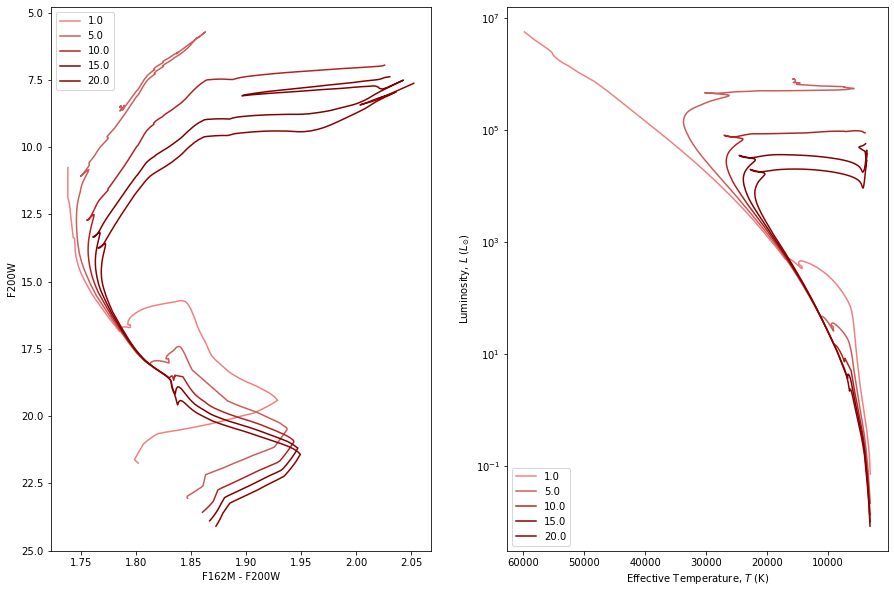

In [5]:
# identify array indeces, create array for labels and colors
idx_arr = [0, 8, 18, 28, 38]

label_arr = np.empty(len(idx_arr))
for i in range(len(idx_arr)):
    label_arr[i] = (idx_arr[i] / 2) + 1
    
color_arr = ["lightcoral", "indianred", "firebrick", "maroon", "darkred"]
    
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    py.plot(instances[idx].points['m_jwst_F162M'] - instances[idx].points['m_jwst_F200W'], 
           instances[idx].points['m_jwst_F200W'], color_arr[i], label=label_arr[i])
    
py.xlabel('F162M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

# Plot HR
py.subplot(1, 2, 2)
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    py.plot(instances[idx].points['Teff'], data_iso_Lsun, color_arr[i], label=label_arr[i])
    
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()
py.legend()